In [1]:
# Codigo para sacar estadisiticas y graficar los datos

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import json 

In [2]:
# Archivo de playlistID x trackID
playlistID_trackID = 'data/playlistid_itemid_1000p.txt'

# Carpeta de datos de features de los tracks
data_folder = 'data_ignored/tracks_dataset_spotify_audio_features'

# Json de id a uri
id_to_uri = 'data/idx2uri.json'

## playlistid_itemid

In [3]:
playlistID_trackID_dict = {}

with open(playlistID_trackID, 'r') as f:
    for line in f:
        playlistID, trackID = line.strip().split()
        if playlistID not in playlistID_trackID_dict:
            playlistID_trackID_dict[playlistID] = []
        playlistID_trackID_dict[playlistID].append(trackID)

In [4]:
len_playlists = [len(playlistID_trackID_dict[playlistID]) for playlistID in playlistID_trackID_dict]

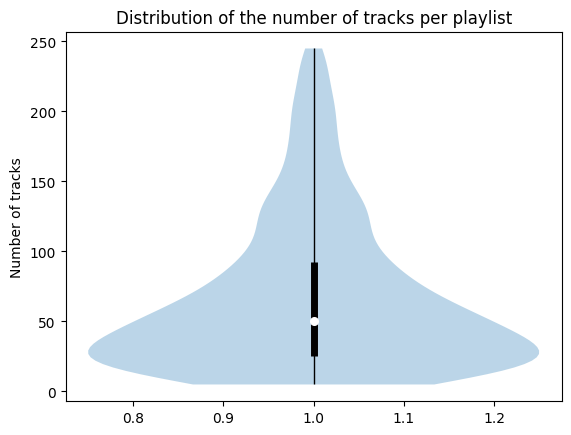

In [5]:
len_playlists = sorted(len_playlists)
plt.figure()
plt.violinplot(len_playlists,showmeans=False, showmedians=False, showextrema=False)
quartile1, medians, quartile3 = np.percentile(len_playlists, [25, 50, 75])
inds = np.arange(1, 1 + 1)
plt.scatter(inds, medians, color='white', s=30, zorder=3, marker='o')
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.vlines(inds, len_playlists[0], len_playlists[-1], color='k', linestyle='-', lw=1)
plt.ylabel('Number of tracks')
plt.title('Distribution of the number of tracks per playlist')
plt.show()


In [6]:
trackID_playlistID_dict = {}

with open(playlistID_trackID, 'r') as f:
    for line in f:
        playlistID, trackID = line.strip().split()
        if trackID not in trackID_playlistID_dict:
            trackID_playlistID_dict[trackID] = []
        trackID_playlistID_dict[trackID].append(playlistID)

In [7]:
len_tracks = [len(trackID_playlistID_dict[trackID]) for trackID in trackID_playlistID_dict]

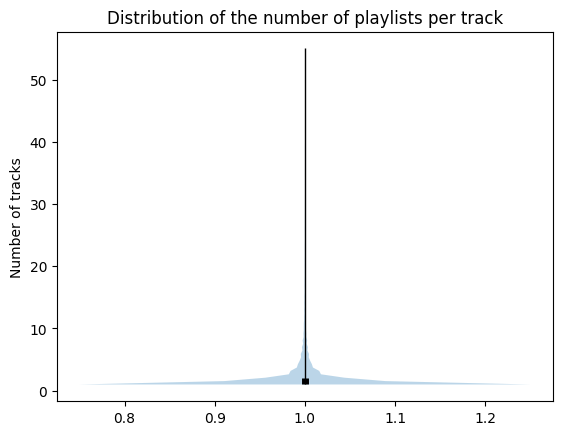

In [8]:
len_tracks = sorted(len_tracks)
plt.figure()
plt.violinplot(len_tracks,showmeans=False, showmedians=False, showextrema=False)
quartile1, medians, quartile3 = np.percentile(len_tracks, [25, 50, 75])
inds = np.arange(1, 1 + 1)
#plt.scatter(inds, medians, color='white', s=30, zorder=3, marker='o')
plt.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
plt.vlines(inds, len_tracks[0], len_tracks[-1], color='k', linestyle='-', lw=1)
plt.ylabel('Number of tracks')
plt.title('Distribution of the number of playlists per track')
plt.show()

## Features

In [9]:
# Leemos los features de los tracks
features_list = []

# Leemos los files de la carpeta
files = os.listdir(data_folder)
for file in tqdm(files):
    with open(os.path.join(data_folder, file), 'r') as f:
        features = json.load(f)
        features_list.append({'uri': file.replace('.json', ''), 'features': features})

100%|██████████| 34443/34443 [03:49<00:00, 149.77it/s]


In [10]:
features_list[0]

{'uri': '000mA0etY38nKdvf1N04af',
 'features': {'danceability': 0.303,
  'energy': 0.616,
  'key': 10,
  'loudness': -8.468,
  'mode': 1,
  'speechiness': 0.0373,
  'acousticness': 0.243,
  'instrumentalness': 2.97e-06,
  'liveness': 0.134,
  'valence': 0.219,
  'tempo': 78.673,
  'type': 'audio_features',
  'id': '000mA0etY38nKdvf1N04af',
  'uri': 'spotify:track:000mA0etY38nKdvf1N04af',
  'track_href': 'https://api.spotify.com/v1/tracks/000mA0etY38nKdvf1N04af',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/000mA0etY38nKdvf1N04af',
  'duration_ms': 214507,
  'time_signature': 4}}

In [11]:
danceability = []
energy = []
key = []
loudness = []
mode = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
duration_ms = []
time_signature = []

In [12]:
errors = 0
for track in features_list:
    try:
        feature = track['features']
        aux_danceability = feature['danceability']
        aux_energy = feature['energy']
        aux_key = feature['key']
        aux_loudness = feature['loudness']
        aux_mode = feature['mode']
        aux_speechiness = feature['speechiness']
        aux_acousticness = feature['acousticness']
        aux_instrumentalness = feature['instrumentalness']
        aux_liveness = feature['liveness']
        aux_valence = feature['valence']
        aux_tempo = feature['tempo']
        aux_duration_ms = feature['duration_ms']
        aux_time_signature = feature['time_signature']
        danceability.append(aux_danceability)
        energy.append(aux_energy)
        key.append(aux_key)
        loudness.append(aux_loudness)
        mode.append(aux_mode)
        speechiness.append(aux_speechiness)
        acousticness.append(aux_acousticness)
        instrumentalness.append(aux_instrumentalness)
        liveness.append(aux_liveness)
        valence.append(aux_valence)
        tempo.append(aux_tempo)
        duration_ms.append(aux_duration_ms)
        time_signature.append(aux_time_signature)
    except:
        errors += 1

In [13]:
errors

3

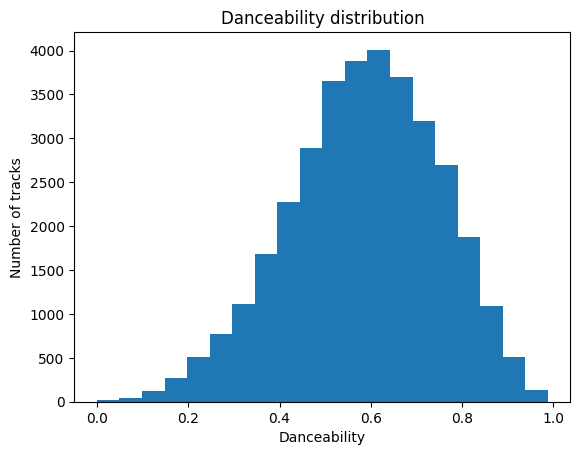

In [14]:
# Danceability
plt.figure()
plt.hist(danceability, bins=20)
plt.xlabel('Danceability')
plt.ylabel('Number of tracks')
plt.title('Danceability distribution')
plt.show()

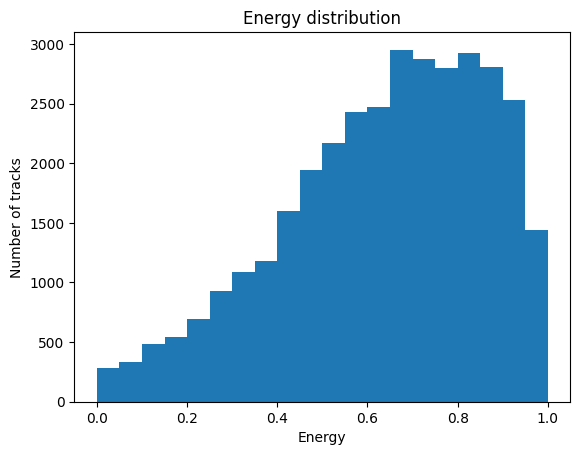

In [15]:
# Energy
plt.figure()
plt.hist(energy, bins=20)
plt.xlabel('Energy')
plt.ylabel('Number of tracks')
plt.title('Energy distribution')
plt.show()

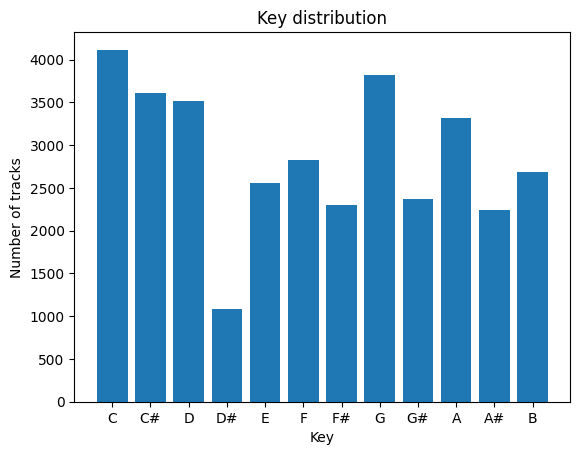

In [16]:
# Key
key_notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
keys_transfomed = {key_notes[i]: key.count(i) for i in range(12)}
plt.figure()
plt.bar(keys_transfomed.keys(), keys_transfomed.values())
plt.xlabel('Key')
plt.ylabel('Number of tracks')
plt.title('Key distribution')
plt.show()


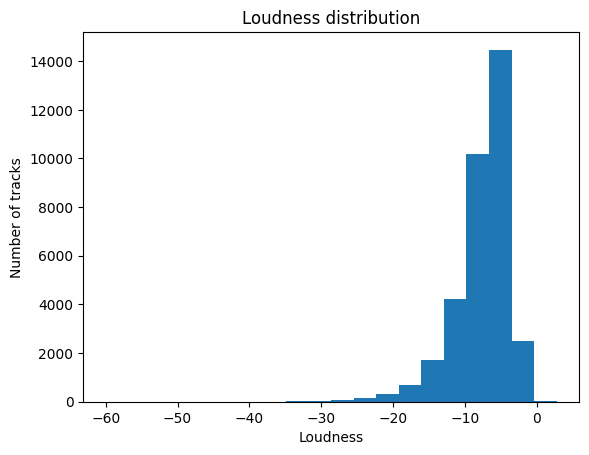

In [17]:
# Loudness
plt.figure()
plt.hist(loudness, bins=20)
plt.xlabel('Loudness')
plt.ylabel('Number of tracks')
plt.title('Loudness distribution')
plt.show()

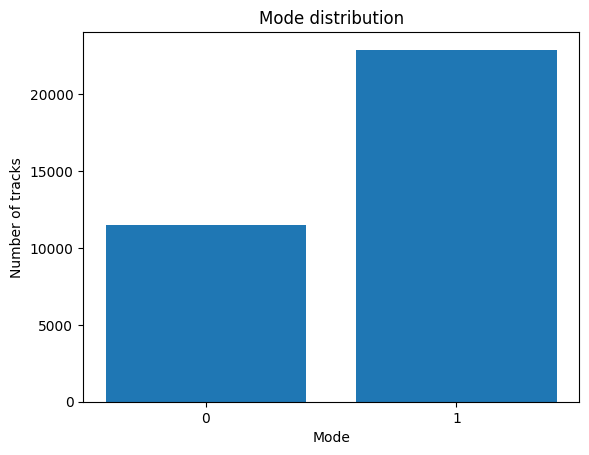

In [18]:
# Mode
plt.figure()
mode_transfomed = {'0': mode.count(0), '1': mode.count(1)}
plt.bar(mode_transfomed.keys(), mode_transfomed.values())
plt.xlabel('Mode')
plt.ylabel('Number of tracks')
plt.title('Mode distribution')
plt.show()

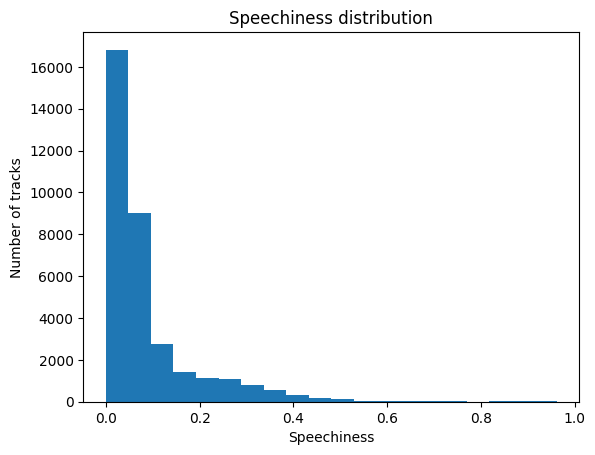

In [19]:
# Speechiness
plt.figure()
plt.hist(speechiness, bins=20)
plt.xlabel('Speechiness')
plt.ylabel('Number of tracks')
plt.title('Speechiness distribution')
plt.show()

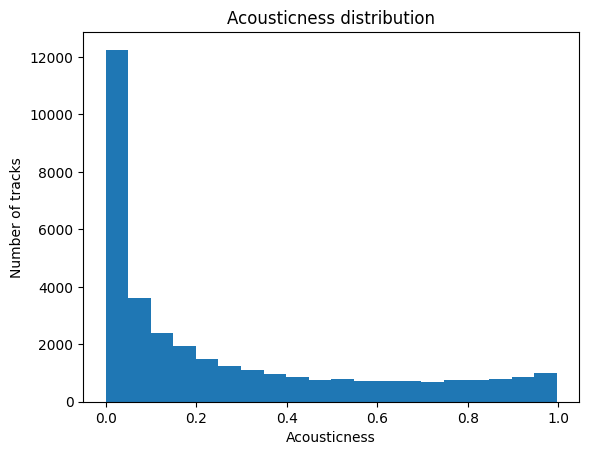

In [20]:
# Acousticness
plt.figure()
plt.hist(acousticness, bins=20)
plt.xlabel('Acousticness')
plt.ylabel('Number of tracks')
plt.title('Acousticness distribution')
plt.show()

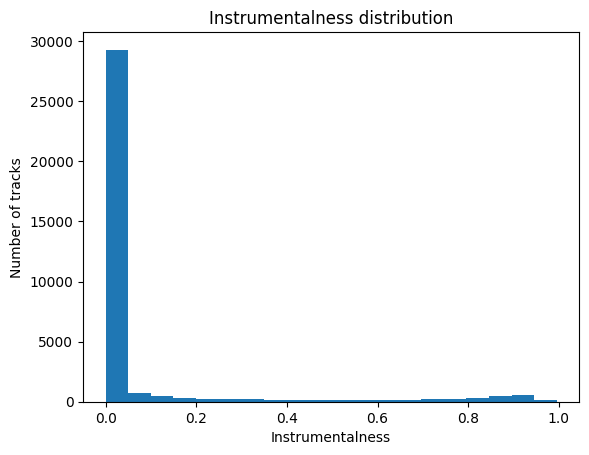

In [21]:
# Instrumentalness
plt.figure()
plt.hist(instrumentalness, bins=20)
plt.xlabel('Instrumentalness')
plt.ylabel('Number of tracks')
plt.title('Instrumentalness distribution')
plt.show()

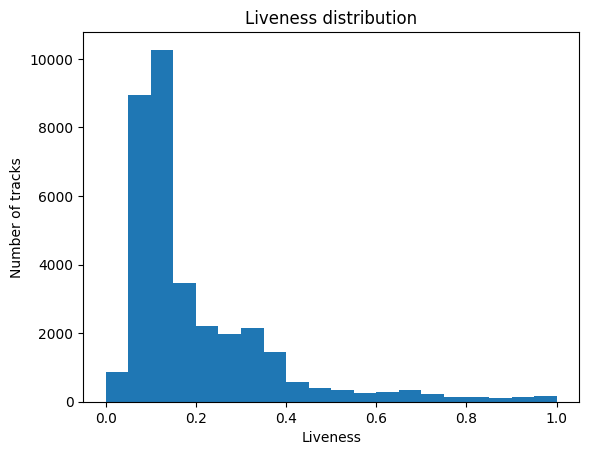

In [22]:
# Liveness
plt.figure()
plt.hist(liveness, bins=20)
plt.xlabel('Liveness')
plt.ylabel('Number of tracks')
plt.title('Liveness distribution')
plt.show()

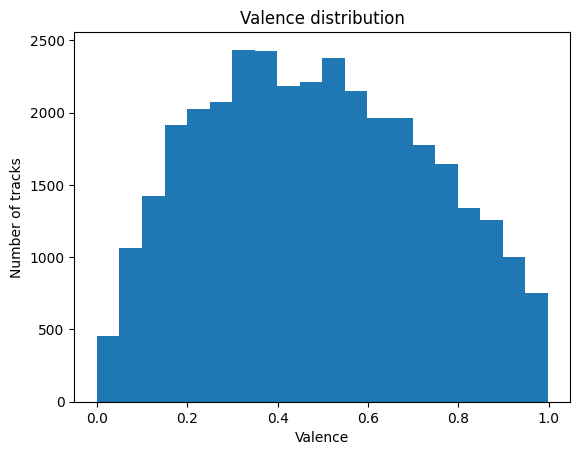

In [23]:
# Valence
plt.figure()
plt.hist(valence, bins=20)
plt.xlabel('Valence')
plt.ylabel('Number of tracks')
plt.title('Valence distribution')
plt.show()

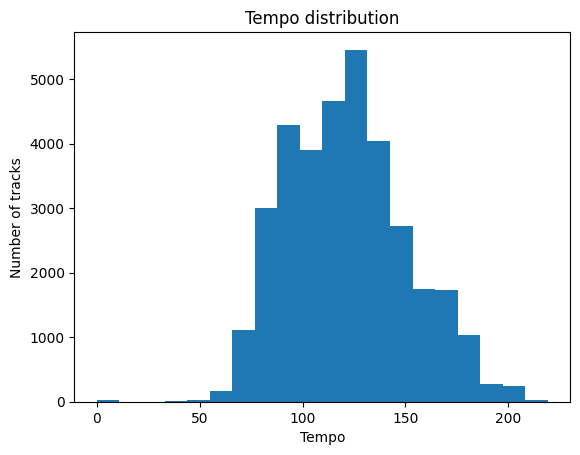

In [24]:
# Tempo
plt.figure()
plt.hist(tempo, bins=20)
plt.xlabel('Tempo')
plt.ylabel('Number of tracks')
plt.title('Tempo distribution')
plt.show()

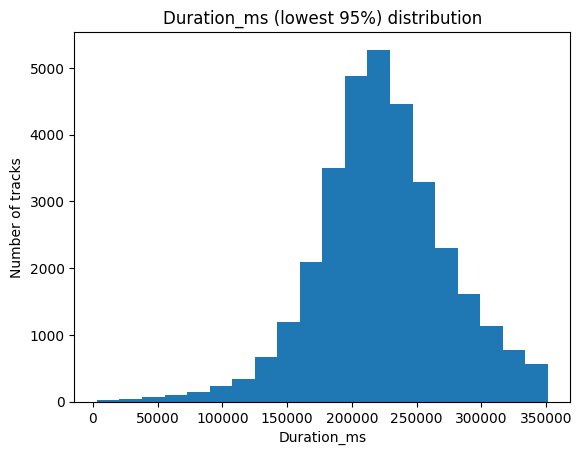

In [25]:
# Duration_ms
duration_ms = sorted(duration_ms)
# Sacamos el 95% mas bajo
duration_ms_95 = duration_ms[:int(0.95*len(duration_ms))]
plt.figure()
plt.hist(duration_ms_95, bins=20)
plt.xlabel('Duration_ms')
plt.ylabel('Number of tracks')
plt.title('Duration_ms (lowest 95%) distribution')
plt.show()